## HSSP Spring 2024: Computing in the Small: Lyman Hurd, Glenn Hurd

### Week 1: Simple programs.

We want to be able to discover under what circumstances can we short-cut running a program.  In other words, when can we make long-term predictions about what a function is going to do on repeated application without having to actually run it.

In [68]:
def plus_one(x):
    return x + 1

In this trivial example we wish to know what happens when we apply this function 100 times to a starting value.  Here is the "hard" way to figure that out:

In [70]:
x = 0
for i in range(100):
    x = plus_one(x)
print(x)

100


A similar analysis applies for the function plus_thirteen.

In [ ]:
def plus_thirteen(x):
    return x + 13

We can see that applying plus_thirteen to 0 for 100 times would give 13 * 100 = 1300.  Let us consider the same problem for repeated multiplication.

In [74]:
def times_two(x):
    return 2 * x

Can we predict what will happen if we apply this function 100 times to 1?

In [76]:
x = 1
for i in range(100):
    x = times_two(x)
print(x)

1267650600228229401496703205376


In [15]:
def my_pow(x, n):
    print(f"computing pow({x}, {n})")
    if n == 0:
        return 1
    if n % 2:
        return x * my_pow(x, n - 1)
    y = my_pow(x, n//2)
    return y * y

In [78]:
my_pow(2, 100)

computing pow(2, 100)
computing pow(2, 50)
computing pow(2, 25)
computing pow(2, 24)
computing pow(2, 12)
computing pow(2, 6)
computing pow(2, 3)
computing pow(2, 2)
computing pow(2, 1)
computing pow(2, 0)


1267650600228229401496703205376

Of course at this point we have to admit that Python knows how to compute powers and we could have saved ourselves work by asking for: 

In [80]:
2**100

1267650600228229401496703205376

## Pascal's Triangle:
Pascal's triangle is formed by starting with a row consisting of "1 1" and then the subsequent row is formed by putting a 1 at the beginning and the end and in the middle taking sums of adjacent elements from the previous row.  For example, the next row would be "1 2 1".

In [49]:
# we are expecting as an argument an integer >= 1.  Try for yourself to see what "bad things" happen if we try
# pascal(0), pascal(-1) or pascal(3.14)

def pascal(n):
    if n == 1:
        row = [1, 1]
    else:
        prev = pascal(n - 1)
        row = [1]
        for i in range(len(prev) - 1):
            row.append(prev[i] + prev[i + 1])
        row.append(1)
    return row

In [86]:
# range in Python always starts at 0.  range(10) gives 0, 1, 2, 3, 4, 5, 6, 7, 8, 9.
# we can get what we want by saying range(1, 11) or simply inserting a ""+ 1"

for i in range(10):
    print(pascal(i + 1))

[1, 1]
[1, 2, 1]
[1, 3, 3, 1]
[1, 4, 6, 4, 1]
[1, 5, 10, 10, 5, 1]
[1, 6, 15, 20, 15, 6, 1]
[1, 7, 21, 35, 35, 21, 7, 1]
[1, 8, 28, 56, 70, 56, 28, 8, 1]
[1, 9, 36, 84, 126, 126, 84, 36, 9, 1]
[1, 10, 45, 120, 210, 252, 210, 120, 45, 10, 1]


What if we only want to know the value on row 100, or even just want to know the values at the 25th element of row 100?  Generating all previous rows
is the "hard way".  Fortunately there is a formula that tells us the values we want.  The value for the kth element in row n (in each row we start counting at 0), is called "n choose k" written C(n, k) or as a bracket with the numbers stacked on top of each other.

Think of it as counting from a deck of _n_ cards how many ways we can deal a hand of _k_ cards.  The first card can be any of the _n_, the second any of thhe cards except the one we already chose so there are _n - 1_ possibilities, and so on until one gets to _n - k_.

However, here is a catch, because we consider the hand: (1, 2, 3) to be the same as the hand (3, 2, 1).  So once we choose k cards we can rearrange them in any of _k_ times _k - 1_ times _k - 2_ ... times 2 times 1 ways (this is called _k_ factorial or _k!_).

_C(n,k) = (n * (n - 1) * (n - 2) * ... * (n - k)) / (p * (p - 1) * (p - 2) * ... * 2 * 1)_

Note in Python 3 we use "//" as our division operator to indicate that we want to stay with whole numbers.  Happily this division always comes out exact,

In [35]:
def choose_n_k(n, k):
    num = 1
    for i in range(n, n - k, -1):
        num *= i
    den = 1
    for i in range(1, k + 1):
        den *= i
    return num // den

There's an interesting symmetry in combinations.  If one wanted to choose 8 items out of 10 possibilities it is equivalent to choosing which 2 we don't want.

In formulas: _C(n, k) = C(n, n - k)_

so to speed things up we use whichever of _k_ or _n - k_ is smaller:

In [7]:
def choose_n_k(n, k):
    if k > n - k:
        return choose_n_k(n, n - k)
    num = 1
    for i in range(n, n - k, -1):
        num *= i
    den = 1
    for i in range(1, k + 1):
        den *= i
    return num // den

In [5]:
choose_n_k(0, 0)

1

In [3]:
def pascal(n):
    return [choose_n_k(n, k) % 2 for k in range(n + 1)]

In [7]:
for k in range(11):
    print(choose_n_k(10, k))

1
10
45
120
210
252
210
120
45
10
1


In [8]:
pascal(10)

[1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1]

In [5]:
def pascal_image(n):
    img = []
    for i in range(n):
        img.append(pascal(i) + (n - i - 1) * [0])
    return img

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline

In [12]:
pascal_image(5)

[[1, 0, 0, 0, 0],
 [1, 1, 0, 0, 0],
 [1, 0, 1, 0, 0],
 [1, 1, 1, 1, 0],
 [1, 0, 0, 0, 1]]

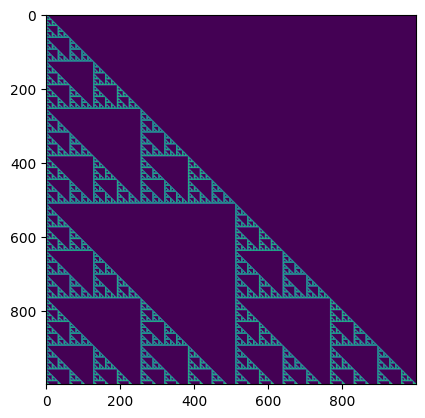

In [14]:
plt.imshow(pascal_image(1000))

Pascal's triangle is usually displayed symmetrically, i.e., wit hthe rows centered.  There is a small amuount of trickiness as each row is offset by half a step from the previous row.

In [1]:
def centered_pascal(n):
    img = []
    for i in range(n):
        img.append((n - i - 1) * [0] + pascal(i) + (n - i - 1) * [0])
    return img

In [9]:
centered_pascal(5)

[[0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 1, 0, 0, 0],
 [0, 0, 1, 0, 1, 0, 0],
 [0, 1, 1, 1, 1, 0],
 [1, 0, 0, 0, 1]]